# Case Study 1: From Exploration to Design

- Name: Brendan Fellows
- Student ID: 15818610
- Link to GitHub Repository: https://github.com/brendancfellows/DSCI-200-case-study-1.git

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

In [1]:
install.packages('tidyverse')
devtools::install_github("lbelzile/hecedsm")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'hecedsm' from a github remote, the SHA1 (df0a5444) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(tidyverse)
library(hecedsm)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hecedsm’


The following object is masked from ‘package:stringr’:

    words




# Task 1

In [3]:
landing_data <- JZBJG22_E2

Summary:
- The primary objective of this study was to find out whether or not trivially informative semantic context can increase people's confidence in their ability to perform a highly complex skill. Specifically, the authors tested and examined on whether watching a short and non-instructional video related to landing a plane would artificially cause an increase in participants’ confidence in their own ability to perform that task, despite lacking actual relevant expertise. Then the study would like to generalize that to the performance of any complex task given the trivial context.
- This research is important since it highlights how someone's confidence can be influenced by minimal or superficial information, which would then lead to overconfidence. This inflated confidence can have serious consequences in real-life settings like flying a plane in this study's example, but also medical emergencies among other complex scenarios.
- The authors hypothesized that participants who watched the trivially informative video would report higher confidence levels than the participants who didn't watch the video. They also explored whether or not confidence was related to other factors such as task order, self-reported expertise, and how easy the participants imagined the task to be.

# Task 2

In [4]:
head(landing_data)
summary(landing_data)

condition,order,conf_dying,conf_pilot,expertise,ease_imagining,gender
<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>
video,dying first,30,0,5,3,man
video,dying first,0,0,5,4,woman
no video,dying first,30,20,5,1,man
video,pilot first,71,71,5,2,woman
no video,dying first,29,16,4,5,woman
video,dying first,0,1,5,5,woman


    condition           order       conf_dying       conf_pilot    
 video   :278   dying first:293   Min.   :  0.00   Min.   :  0.00  
 no video:298   pilot first:283   1st Qu.:  9.00   1st Qu.:  0.00  
                                  Median : 23.00   Median : 10.00  
                                  Mean   : 31.46   Mean   : 20.79  
                                  3rd Qu.: 51.00   3rd Qu.: 30.00  
                                  Max.   :100.00   Max.   :100.00  
   expertise     ease_imagining    gender   
 Min.   :1.000   Min.   :1.000   man  :173  
 1st Qu.:5.000   1st Qu.:2.000   woman:403  
 Median :5.000   Median :4.000              
 Mean   :4.476   Mean   :3.311              
 3rd Qu.:5.000   3rd Qu.:5.000              
 Max.   :5.000   Max.   :5.000              

Exploration:
- The variables condition, order, and gender are all categorical variables as they are all of factor type with two different labels each. The variables conf_dying and conf_pilot are numerical based on a likert scale from 0 to 100, and the expertise and ease_imagining variables are numeric based on a likert scale from 0 to 5.
- No, no variables need to be changed. Although the numerical variables are not continuous and have a finite range and could be seen as categorical, we will treat them as numerical for the analysis.
- There are no missing values for any of the variables.
- No, there is no class imbalance between any of the variables as they are all pretty much evenly split.

# Task 3

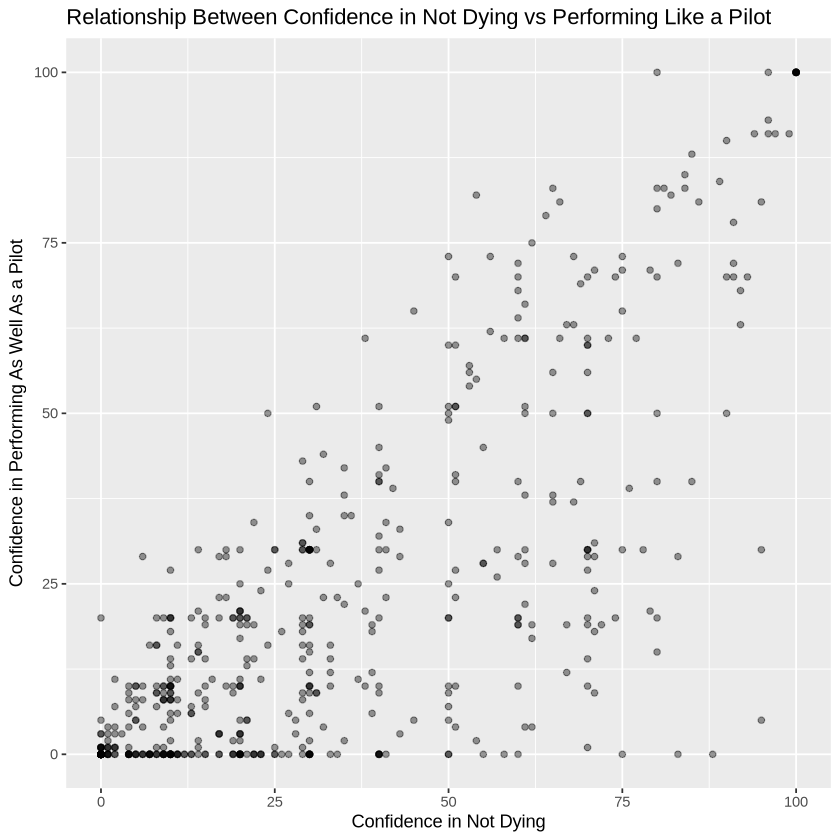

In [5]:
plot1 <- ggplot(landing_data, aes(x = conf_dying, y = conf_pilot)) +
    geom_point(alpha = 0.4) +
    labs(title = "Relationship Between Confidence in Not Dying vs Performing Like a Pilot",
         x = "Confidence in Not Dying", y = "Confidence in Performing As Well As a Pilot")
plot1

Insights:

There is a moderately strong positive relationship between confidence in not dying and confidence in performing as well as a pilot, therefore participants who report high confidence in one tend to report high confidence in the other. Additionally, there are almost no participants who reported a higher confidence in performing like a pilot than not dying which makes sense however logically there should be none which indicates some possible human error or inconsistancy within the data.

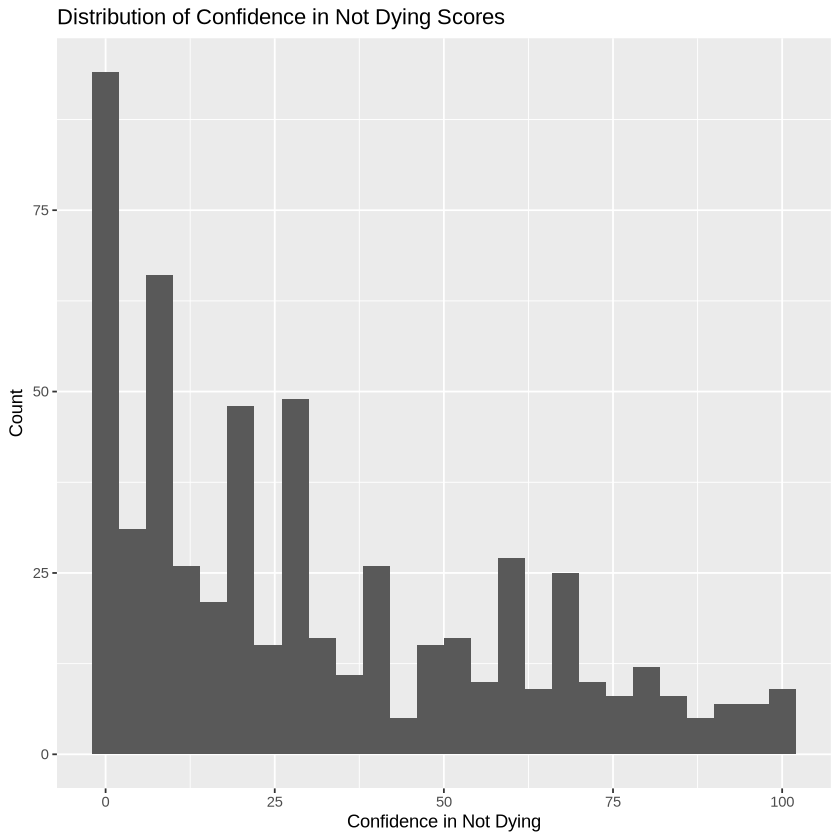

In [6]:
plot2 <- ggplot(landing_data, aes(x = conf_dying)) +
    geom_histogram(binwidth = 4) +
    labs(title = "Distribution of Confidence in Not Dying Scores",
         x = "Confidence in Not Dying", y = "Count")
plot2

Insights:

The distribution of confidence scores is right-skewed with more participants reporting low confidence in not dying. Additionally, the full range of confidence scores covers the entire 0-100 scale so there is a lot of variability.

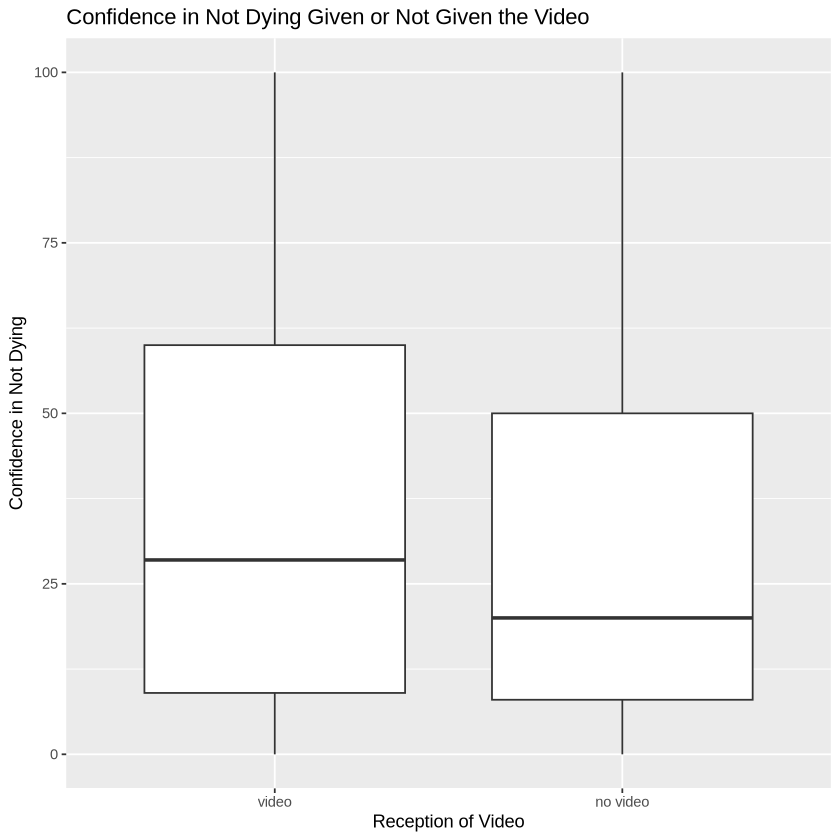

In [7]:
plot3 <- ggplot(landing_data, aes(x = condition, y = conf_dying)) +
    geom_boxplot() +
    labs(title = "Confidence in Not Dying Given or Not Given the Video",
         x = "Reception of Video", y = "Confidence in Not Dying")
plot3

Insights:

Participants who recieved the video tend to report higher confidence compared to the ones who didn't. The spread of confidence scores within the IQR is also wider for those who recieved the video suggesting greater variability in how the video affected the participants’ confidence.

# Task 4

In [8]:
med <- landing_data |>
    summarize(med = median(conf_dying)) |>
    pull(med)
med

[1] 23

Summary Statistics:

For measuring the summary statistic of conf_dying, I used the median since the distribution of conf_dying scores is right-skewed so this avoids the bias that would have affected the mean. A median of 23 indicates that generally participants had a low confidence in being able to land the plane without dying.

In [9]:
prop <- landing_data |>
    count(condition) |>
    mutate(prop = n / sum(n))
prop

condition,n,prop
<fct>,<int>,<dbl>
video,278,0.4826389
no video,298,0.5173611


There are 278 participants in the video treatment group and 298 in the no-video control group. The proportions are roughly balanced at roughly 48% and 52%, so that makes sure that any comparisons between conditions are fair and not biased by uneven group sizes.

# Task 5

Research Question:

- Does watching a trivially informative video increase people’s overall confidence in performing a complex task, particularly among people with lower self-reported expertise?
- No, I don't need to split the data into training and testing sets for this research question. The goal is to compare confidence levels between experimental conditions and levels of expertise, instead of building a predictive model where you would need those sets. Therefore, using the full dataset allows for a better estimation of the relationships between the variables.
- The variable I will create is conf_average which is the average of conf_dying and conf_pilot. Thus it combines confidence scores across both pre-existing ratings into a single one, this will eliminate any possible noise from differences between the other two confidence scores. It's useful because it captures the participants’ general confidence level, which can be compared across the video treatments and their levels of expertise.

In [10]:
landing_data <- landing_data |>
    mutate(conf_average = (conf_dying + conf_pilot) / 2)

# Task 6

Describing Design

- The authors are mainly trying to answer a causal question. They want to know whether watching a trivially informative video causes people to feel more confident about performing a complex task. Additionally, since participants were randomly assigned to either watch a video or not, the study also involves inferential analysis, where results from the sample are used to make conclusions about a larger population.
- The population of this study is adults with little or no real expertise in complex skills, in this case, landing an plane. The sample is the 576 participants in the study. They were most likely recruited online and completed the experiment by watching a video, or not, and then reporting their confidence scores.
- This study is a controlled experiment since the researchers actively assigned the participants to the treatment group where they watch the video or the control group where they don't watch the video. Since they actually did something in an effort to observe the effect of it, it is a controlled experiment not an observational study.

# Task 7

Sources of Error:

- Yes, the researchers controlled for confounding variables by using random assignment to assign the treatment and control groups. Since the groups are random, this balances and potential confounding variables like prior confidence or age across the groups.
- Yes, there may be sampling bias caused by the fact that participants were likely recruited online which is a form of convenience sampling. Therefore, since the sample is fundamentally different than the general population in the fact that they are people who would sign up for this study, it could limit how well the results generalize to the population.

# Task 8

My study design:

In my design of this study, I would still use a controlled experiment with random assignment just like the researchers did, since this is a great way to identify causal effects. Although, ideally I would use a better sampling method like stratified sampling to have equal representation of people of different ages, education levels, and knowledge of planes. They most likely chose convenience sampling because it is faster, cheaper, and easier to perform for an online experiment, and realistically, without unlimited money and resources my study would have to do the same thing.

# Reproducibility Checklist
- Reads sensibly: check
- No continuity errors: check
- Output is recent and relevant: check
- Files are present: check
- Files up to date: check